Loan Approval Prediction System



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE


In [ ]:
df = pd.read_csv("loan_approval_dataset.csv")
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [ ]:
for col in df.select_dtypes(include=[np.number]).columns:
    df[col].fillna(df[col].median(), inplace=True)

for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

df.isnull().sum()


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [ ]:
le = LabelEncoder()
for col in df.select_dtypes(include=['object', 'category']).columns:
    df[col] = le.fit_transform(df[col])

df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,2,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,4,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1


Features shape: (4269, 11)
Target distribution:
loan_status
0    2656
1    1613
Name: count, dtype: int64


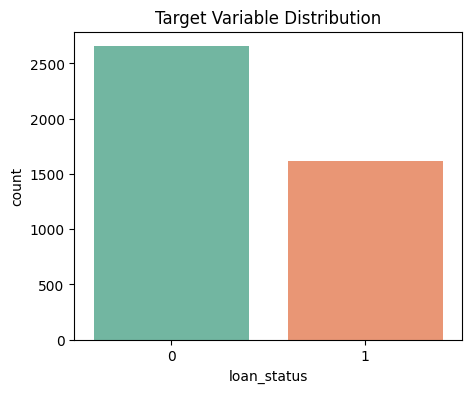

In [103]:
target = 'loan_status'  # adjust if needed

# Drop ID-like column if exists
if 'loan_id' in df.columns:
    X = df.drop(columns=[target, 'loan_id'])
else:
    X = df.drop(columns=[target])

y = df[target]

print(f"Features shape: {X.shape}")
print(f"Target distribution:\n{y.value_counts()}")

# --- Visualization ---
plt.figure(figsize=(5,4))
sns.countplot(x=y, palette='Set2')
plt.title("Target Variable Distribution")
plt.show()


In [104]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"Train samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")


Train samples: 3415, Test samples: 854


In [105]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



=== Logistic Regression ===
              precision    recall  f1-score   support

           0     0.9266    0.9510    0.9387       531
           1     0.9159    0.8762    0.8956       323

    accuracy                         0.9227       854
   macro avg     0.9212    0.9136    0.9171       854
weighted avg     0.9225    0.9227    0.9224       854



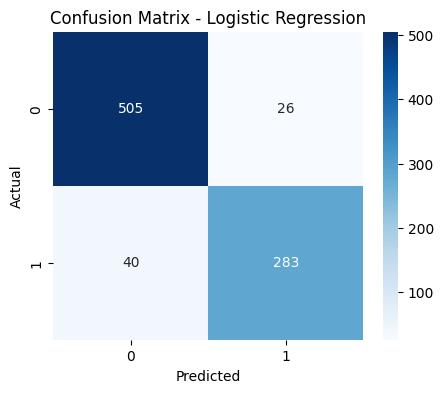


=== Decision Tree ===
              precision    recall  f1-score   support

           0     0.9703    0.9849    0.9776       531
           1     0.9746    0.9505    0.9624       323

    accuracy                         0.9719       854
   macro avg     0.9725    0.9677    0.9700       854
weighted avg     0.9719    0.9719    0.9718       854



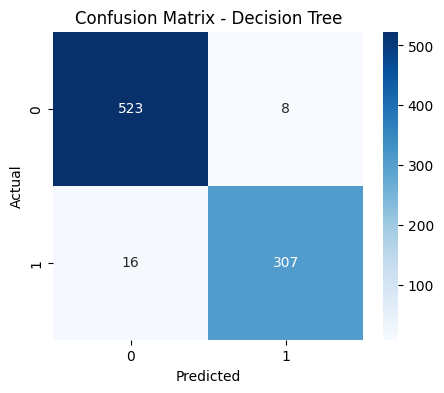

In [106]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n=== {name} ===")
    print(classification_report(y_test, y_pred, digits=4))
    
    # --- Visualization ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


Bonus


=== Logistic Regression (SMOTE applied) ===
              precision    recall  f1-score   support

           0     0.9471    0.9435    0.9453       531
           1     0.9077    0.9133    0.9105       323

    accuracy                         0.9321       854
   macro avg     0.9274    0.9284    0.9279       854
weighted avg     0.9322    0.9321    0.9321       854



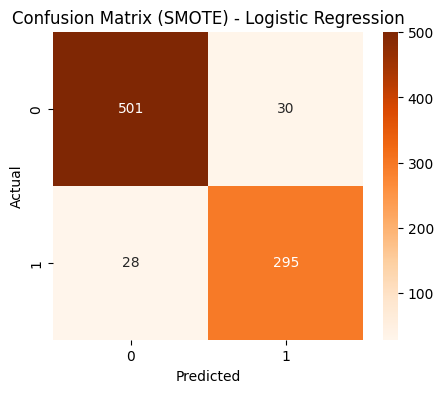


=== Decision Tree (SMOTE applied) ===
              precision    recall  f1-score   support

           0     0.9739    0.9849    0.9794       531
           1     0.9748    0.9567    0.9656       323

    accuracy                         0.9742       854
   macro avg     0.9743    0.9708    0.9725       854
weighted avg     0.9742    0.9742    0.9742       854



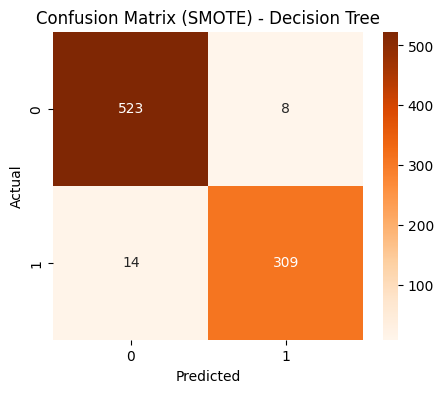

In [108]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

for name, model in models.items():
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n=== {name} (SMOTE applied) ===")
    print(classification_report(y_test, y_pred, digits=4))
    
    # --- Visualization ---
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix (SMOTE) - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


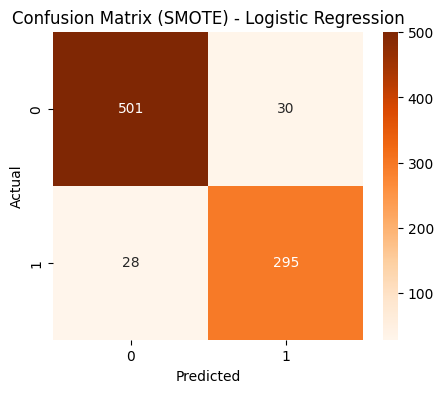

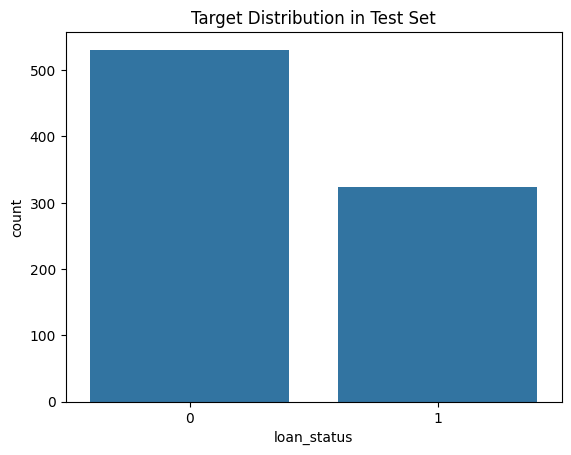

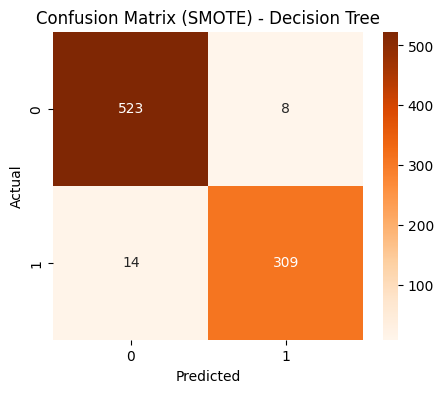

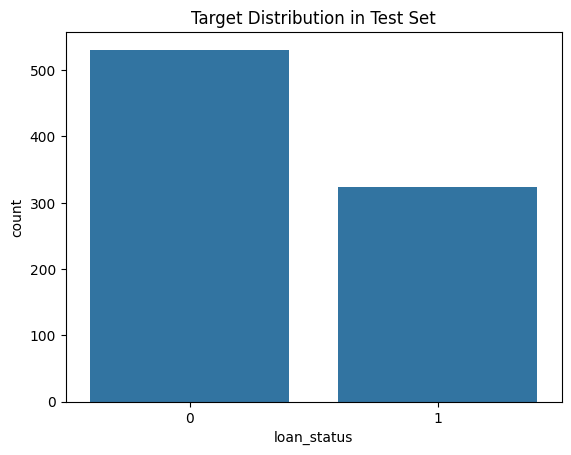

In [95]:
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    
    # Confusion matrix heatmap
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=np.unique(y), yticklabels=np.unique(y))
    plt.title(f"Confusion Matrix (SMOTE) - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Optional: Target distribution bar
    sns.countplot(x=y_test)
    plt.title("Target Distribution in Test Set")
    plt.show()
